# Caso de uso 2
# Diabetes

## Index:

1. Introducción.
2. Metodología.
3. Entendimiento del negocio.
4. Aproximación analitica.
5. Requerimientos de datos.
6. Recolección de datos.
7. Entendimiento de los datos.
8. Preparación de los datos.
9. Modelado.
10. Evaluación.
11. Despliegue.
12. Realimentación.

## 1. Introducción

El objetivo de este proyecto es el dar solución a la prueba técnica requerida para el rol de científico de datos en Agata. Para esto se ha seleccionado el caso de uso numero 2 relacionado con la diabetes.

## 2. Metodología 

La metodología analitica seleccionada para el desarrollo de la prueba técnica esta basada en CRISP-DM, fué creada por John Rollings y utilizada activamente por IBM en la solución e implementación de proyectos de ciencia de datos. Esta metodología pretende establecer una serie de actividades para resolver un problema analítico, proponiendo diez posibles etapas que deben resolverse en cualquier proyecto de ciencia de datos.

Esta metodología pretende dar respuesta a diez preguntas diferentes a través del desarrollo de igual número de actividades.


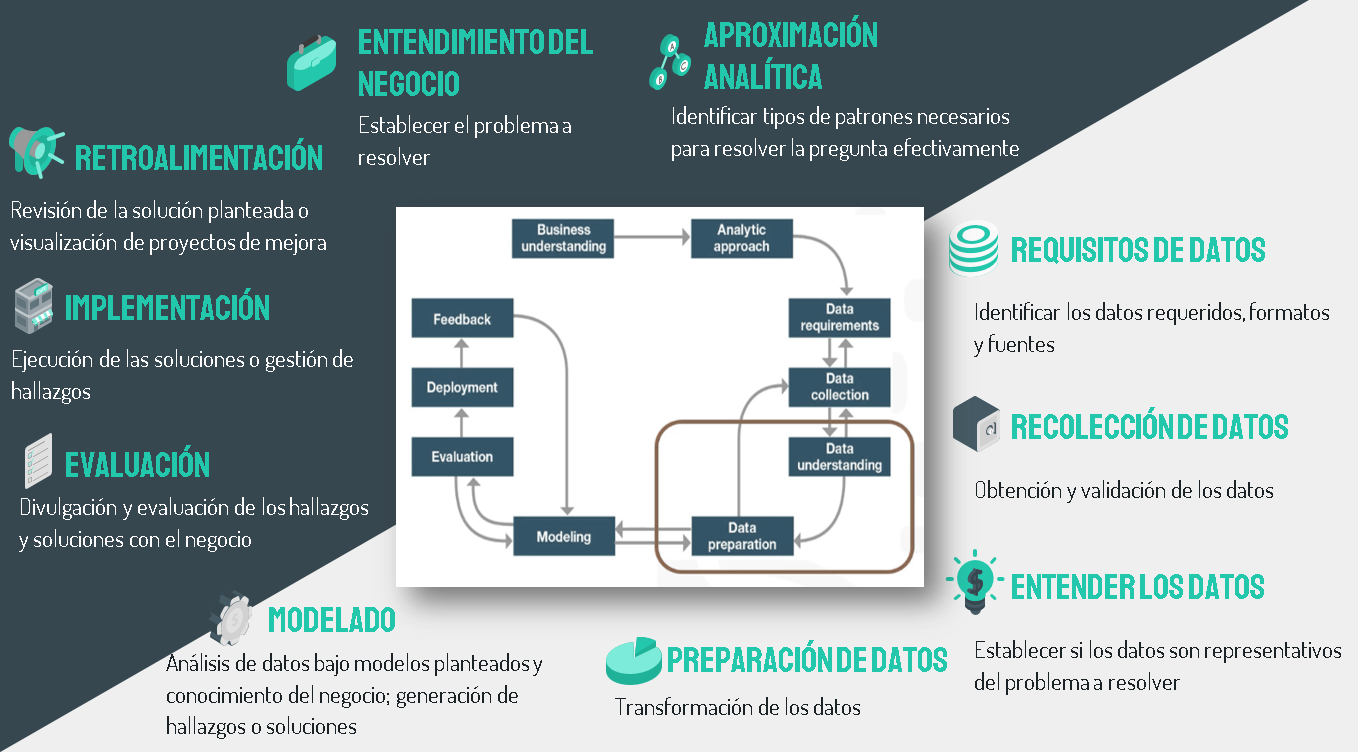


Preguntas a resolver en cada actividad.

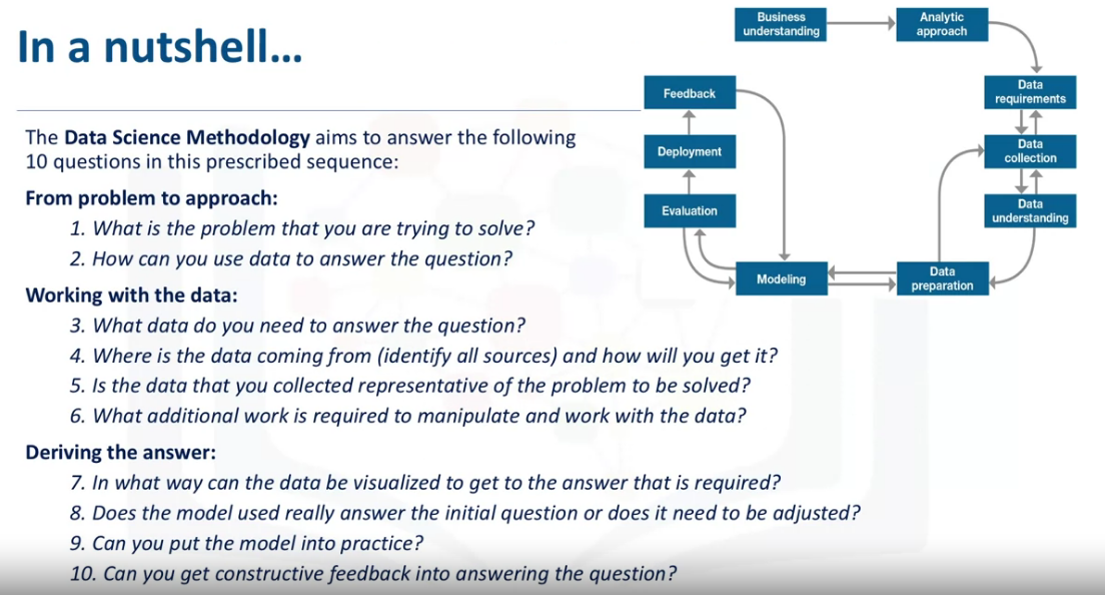

En este documento vamos a navegar por cada una de las fases, mostrando el desarrollo de cada una, el archivo con el código se puede ver [aquí](link)

## 3. Entendimiento del negocio

En esta actividad establecemos el problema a resolver. 

¿Cuál es el problema a resolver?

- En este caso la finalidad es la de clasificar un resultado paciente-hospital a partir de los datos brindados en "Diabetes 130-US hospitals for years 1999-2008", generando un documento que contenga el proceso realizado y el código ejecutable para su evaluación por parte del equipo interno de Agata.

## 4. Aproximación analitica.

Se debe identificar el tipo de análisis a desarrollar para resolver la pregunta de manera efectiva.

¿Cómo podemos utilizar los datos para resolver el problema planteado?

- Debido a la naturaleza del problema se debe de encontar un modelo supervisado de clasificación que permita establecer si un paciente va a sufrir un reingreso o no.  

## 5. Requerimientos de datos 

Identificar los datos necesarios, los formatos y fuentes.

¿Qué datos son necesarios para resolver el problema?

Los datos que son necesarios para crear un modelo que permita clasificar si un cliente va a reingresar o no, son los entregados por Agata mediante el set de datos "Diabetes 130-US hospitals for years 1999-2008" en el [link](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#)

Después de descargarlos, los datos se encuentran en el archivo "diabetic_data.csv", estos obedecen a datos estructurados en el formato csv.



## 6. Recolección de datos

Obtención de los datos y validación.

¿En dónde se encuentran los datos y cómo se obtienen?

- La recolección de datos no es necesaria, dado que la totalidad de los datos se encuentran en el archivo "diabetic_data.csv", estos se consultaran y utilizaran mediante el código en Python desde el archivo CSV.

## 7. Entendimiento de los datos

En este paso se efectúa la limpieza de datos y análisis exploratorio de datos (EDA), ayudándose de herramientas de visualización en python, para así validar la completitud, calidad y entender el comportamiento de los mismos (estadística descriptiva)

### Limpieza de datos

In [187]:
# Importar las librerías requeridas para el EDA
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [188]:
# Lectura de los datos en archivo CSV en dataframe
ruta = r"C:/Users/usuario.DESKTOP-3A59NKC.000/OneDrive/Escritorio/Trabajo/Agata/Agata_DS_Prueba_Tecnica/dataset_diabetes/"
df = pd.read_csv(ruta+"diabetic_data.csv")

In [189]:
# Visualización de la data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Se observa que el atributo "weight" tiene valores iguales a "?", estos son tomados como valores nulos. 

In [190]:
# Validación del tamaño del data set
df.shape

(101766, 50)

In [191]:
# Revisión de los atributos
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [192]:
# Validación de valores unicos para los atributos categoricos

col_cat = df.select_dtypes(include=['object']).columns.tolist()
for i in col_cat:
    print("Valores unicos de:", i)
    print(df[i].unique())
    print(r' ')

Valores unicos de: race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
 
Valores unicos de: gender
['Female' 'Male' 'Unknown/Invalid']
 
Valores unicos de: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
 
Valores unicos de: weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
 
Valores unicos de: payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
 
Valores unicos de: medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Ped

Mediante la revisión de valors únicos se pueden observar varios valores que pueden ser tratados como nulos, por lo tanto se asumen que los siguientes valores son nulos (la validación se debería realizar con algún stakeholder)
- Varios: '?'
- gender: 'Unknown/Invalid'
- max_glu_serum: 'None'
- A1Cresult: 'None'

In [193]:
# Validación del porcentaje de valores marcados como nulos

#Para '?'
for col in df.columns:
    if df[col].dtype == object:
         print(col+(':'), df[col][df[col] == '?'].count()*100/len(df[col]))

race: 2.2335554114340743
gender: 0.0
age: 0.0
weight: 96.85847925633315
payer_code: 39.5574160328597
medical_specialty: 49.08220820313268
diag_1: 0.020635575732562937
diag_2: 0.3517874339170253
diag_3: 1.398305917497003
max_glu_serum: 0.0
A1Cresult: 0.0
metformin: 0.0
repaglinide: 0.0
nateglinide: 0.0
chlorpropamide: 0.0
glimepiride: 0.0
acetohexamide: 0.0
glipizide: 0.0
glyburide: 0.0
tolbutamide: 0.0
pioglitazone: 0.0
rosiglitazone: 0.0
acarbose: 0.0
miglitol: 0.0
troglitazone: 0.0
tolazamide: 0.0
examide: 0.0
citoglipton: 0.0
insulin: 0.0
glyburide-metformin: 0.0
glipizide-metformin: 0.0
glimepiride-pioglitazone: 0.0
metformin-rosiglitazone: 0.0
metformin-pioglitazone: 0.0
change: 0.0
diabetesMed: 0.0
readmitted: 0.0


Exiten atributos con un alto porcentaje de valores igual a '?', por lo que las siguientes columnas deben ser eliminadas:

- weight
- payer_code
- medical_specialty

Las demas columnas con valores iguales a '?' tienen proporciones menores al 3 porciento, por lo que para las siguientes columnas se debe de utilizar un método de imputación para valores nulos:

- race: moda
- diag_1: moda
- diag_2: moda
- diag_3: moda

In [194]:
#Para gender = 'Unknown/Invalid'
col = 'gender'
valor = 'Unknown/Invalid'
print(col+(':'), df[col][df[col] == valor ].count()*100/len(df[col]))

gender: 0.002947939390366134


El porcentaje de valores igual a 'Unknown/Invalid' es bajo, por lo que se puede imputar la moda.

In [195]:
#Para A1Cresult = 'None'
col = 'A1Cresult'
valor = 'None'
print(col+(':'), df[col][df[col] == valor ].count()*100/len(df[col]))

A1Cresult: 83.27732248491638


El porcentaje de valores 'None' es alto, por lo que el atributo debe ser eliminado. 

In [196]:
#Para max_glu_serum = 'None'
col = 'max_glu_serum'
valor = 'None'
print(col+(':'), df[col][df[col] == valor ].count()*100/len(df[col]))

max_glu_serum: 94.74677200636755


El porcentaje de valores 'None' es alto, por lo que el atributo debe ser eliminado. 

In [197]:
# Eliminación de columnas a no utilizar.
col_del = ['weight', 'payer_code', 'medical_specialty', 'A1Cresult', 'max_glu_serum']
df.drop(columns=col_del, inplace=True)

In [198]:
# Imputación de valores nulos
df['race'].replace({'?': df['race'].mode()[0]}, inplace = True)
df['gender'].replace({'Unknown/Invalid': df['gender'].mode()[0]}, inplace = True)
df['diag_1'].replace({'?': df['diag_1'].mode()[0]}, inplace = True)
df['diag_2'].replace({'?': df['diag_2'].mode()[0]}, inplace = True)
df['diag_3'].replace({'?': df['diag_3'].mode()[0]}, inplace = True)

In [199]:
# Validar porcentaje de valores nulos
df.isnull().sum()*100/df.shape[0]

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol

Atributos con un único valor.

Los atributos 'examide' y 'citoglipton' tienen un único valor, por lo que no aportan información al modelo, estos atributos son eliminados por esta razón.

In [200]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           2
age                             10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide                        4
glyburide                        4
tolbutamide                      2
pioglitazone        

In [201]:
df.drop(columns=['examide', 'citoglipton'], inplace=True)

In [202]:
# Validación de filas duplicadas
print('Cantidad de filas duplicadas:',df.duplicated().sum()) 

Cantidad de filas duplicadas: 0


Por la naturaleza del dato, deben ser eliminadas las siguientes columnas:
- encounter_id
- patient_nbr

In [203]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [204]:
# Obtención de información del tipo de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

Se encuentran que los siguientes atributos cuyo tipo de dato debe ser validado y/o corregidos:
- admission_type_id es int64 y debe ser object
- discharge_disposition_id es int64 y debe ser object
- admission_source_id es int64 y debe ser object

In [205]:
# Modificar el tipo de datos para los atributos seleccionados

col_cam_tipo = ['admission_source_id', 'discharge_disposition_id', 'admission_type_id']

for i in col_cam_tipo:
    df[i] = df[i].astype('object')


Los atributos diag_1, diag_2 y diag_3 se encuentran códificados, los valores de estos pueden ser modificados para obtener una categorización más amplia. Según la información brindad en uno de los papers de documentación, las asignaciones de categorías son las siguientes:

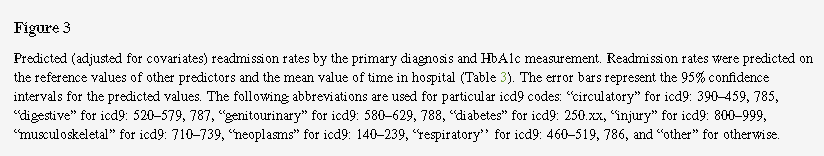

Además debe tenerse en cuenta que algunos valores tienen incrustadas letras V y E, que deben ser modificadas al valor cero.


In [206]:
# Creación de función para la eliminación de letras en diag_1, diag_2 y diag_3
import re

def Modi_letras(x):
    x = re.sub("V[0-9]*", "0", str(x)) 
    x = re.sub("E[0-9]*", "0", str(x)) 
    x = re.sub('NaN', "-1", str(x)) 
    return x

In [207]:
df['diag_1'] = df['diag_1'].apply(Modi_letras).astype(float)
df['diag_2'] = df['diag_2'].apply(Modi_letras).astype(float)
df['diag_3'] = df['diag_3'].apply(Modi_letras).astype(float)

In [208]:
# Creación de función para la transformación de valores en diag_1, diag_2 y diag_3

def transValores(x):
    if x>=390 and x<=459 or x==785:
        cat = 'circulatory'
    elif x>=460 and x<=519 or x==786:
        cat = 'respiratory'
    elif x>=520 and x<=579 or x==787:
        cat = 'digestive'
    elif x==250:
        cat = 'diabetes'
    elif x>=800 and x<=999:
        cat = 'injury'          
    elif x>=710 and x<=739:
        cat = 'musculoskeletal'   
    elif x>=580 and x<=629 or x==788:
        cat = 'genitourinary'
    elif x>=140 and x<=239 :
        cat = 'neoplasms'
    elif x==-1:
        cat = np.NaN
    else :
        cat = 'other'

    return cat

In [209]:
df['diag_1'] = df['diag_1'].apply(transValores)
df['diag_2'] = df['diag_2'].apply(transValores)
df['diag_3'] = df['diag_3'].apply(transValores)

In [210]:
df['diag_1'].value_counts()

circulatory        30458
other              26694
respiratory        14423
digestive           9475
injury              6974
genitourinary       5117
musculoskeletal     4957
neoplasms           3433
diabetes             235
Name: diag_1, dtype: int64

Dado que las cantidades de datos para los atributos de consumo de medicamentos son muy bajos y pueden se reagrupados en si se medicó o no, se realiza la transformación de los valores a 1 y 0 correspondientemente.

In [211]:
df['repaglinide'].value_counts()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [212]:
medicamentos = drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in medicamentos:
    df[col] = df[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    df[col] = df[col].astype(int)

In [213]:
df['repaglinide'].value_counts()

0    100227
1      1539
Name: repaglinide, dtype: int64

### Analisis Exploratorio de Datos (EDA)

#### Analisis univariado

Primero ejecuto el análisis de datos para cada uno de los atributos categóricos, haciendo uso de visualizaciones.  

In [214]:
# Creación de una función para graficar barras con los porcentajes de registros

def Graph_bars (variable):
    per = df[variable].value_counts(0)
    g = sns.catplot(data = df, y = per.index, x = per*100/sum(per), kind = 'bar', orient = 'h',
                    order = df[variable].value_counts().index, height = 6, aspect = 1.3)
    plt.title('Porcentaje de observaciones por ' + variable + '\n')
    for p in g.ax.patches:
        txt = str(p.get_width().round(2)) + '%'
        txt_y = p.get_y() + 0.2
        txt_x = p.get_width()+0.3
        g.ax.text(txt_x,txt_y,txt)
    plt.show();

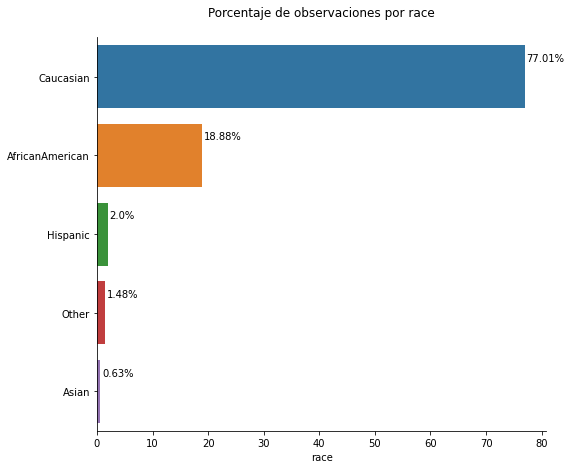

In [215]:
Graph_bars('race')

Podemos observar como la mayoría de los registros obedecen a pacientes cuya raza es Caucásico, por lo que se deben de validar cual fué el tipo (diseño) de recolección de datos y si los resultados son aplicables para todas las razas o no.

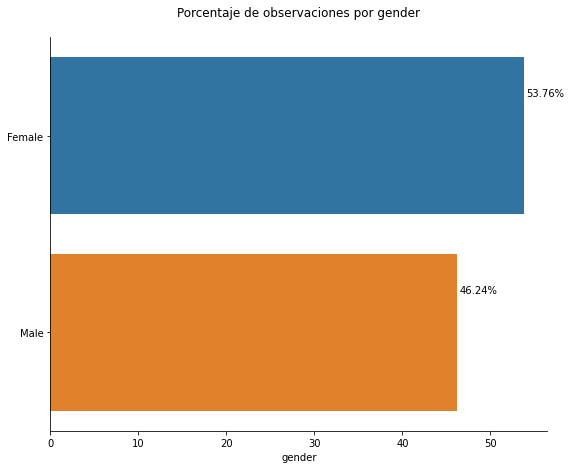

In [216]:
Graph_bars('gender')

Cerca del 54 porciento de los pacientes son mujeres.

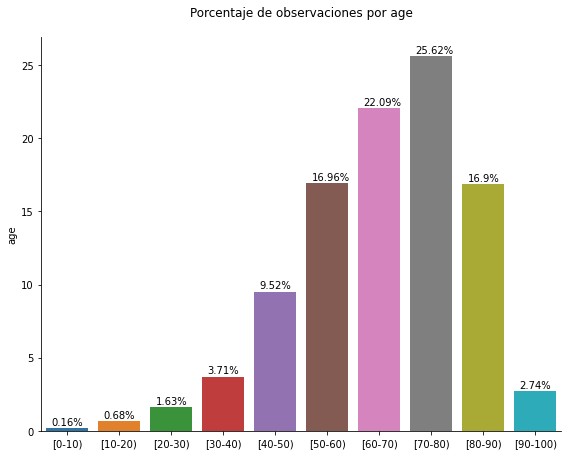

In [217]:

per = df['age'].value_counts(0)
g = sns.catplot(data = df, x = per.index, y = per*100/sum(per), kind = 'bar', orient = 'v',
                height = 6, aspect = 1.3,
                order = df['age'].unique())
plt.title('Porcentaje de observaciones por ' + 'age' + '\n')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_y = p.get_height() + 0.2
    txt_x = p.get_width()+0.3
    g.ax.text(p.get_x()-0.3+p.get_width()/2, txt_y, txt)
plt.show();

Cerca del 80% de los pacientes tiene un rango de edad entre 50 y 90 años, es decir que la mayoría de los pacientes son personas mayores. El 48% se encuentra entre los 60 y 80 años.

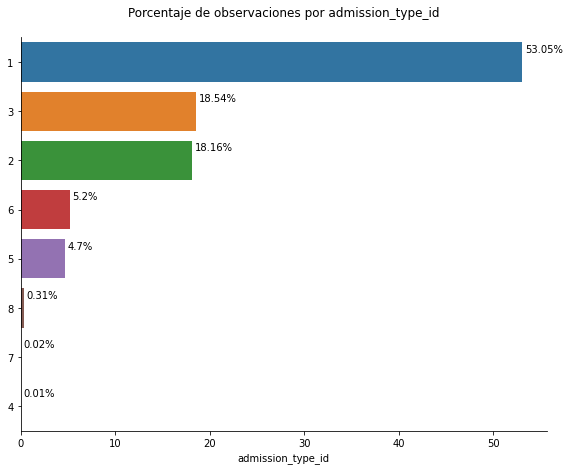

In [218]:
Graph_bars('admission_type_id')

El 52% de los pacientes tuvieron una admisión de tipo 1, es decir por emergencias.

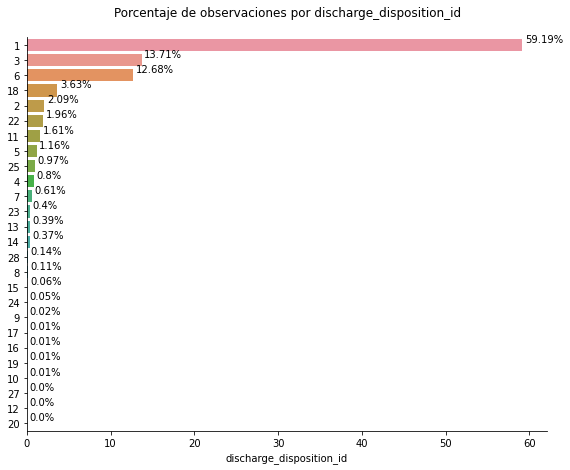

In [219]:
Graph_bars('discharge_disposition_id')

Cerca del 60% de los pacientes fueron despachados a la casa, el 13% a Discharged/transferred to SNF y el 12.68% a Discharged/transferred to home with home health service, mientras que los demás despachos o disposiciones fueron mínimas. Se podría pensar en realizar transformaciones a los datos y agrupar categorías más amplias.


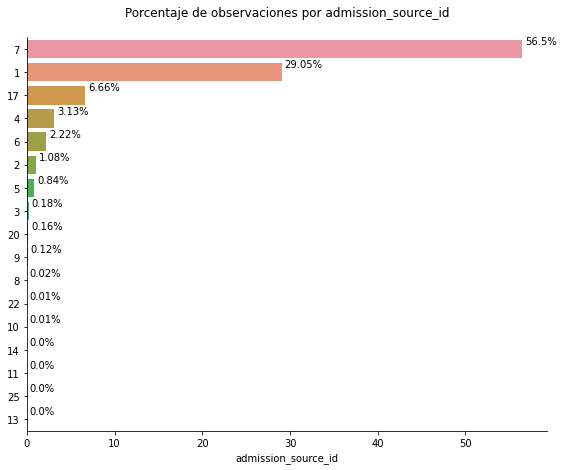

In [220]:
Graph_bars('admission_source_id')

La mayoría de los ingresos se dan desde el cuarto de emergencias, esto tiene sentido siendo que el tipo de admisiones con mayor representación es por emergencias. La entrada de referidos por el médico es la segunda clase de fuentes de admisión. 

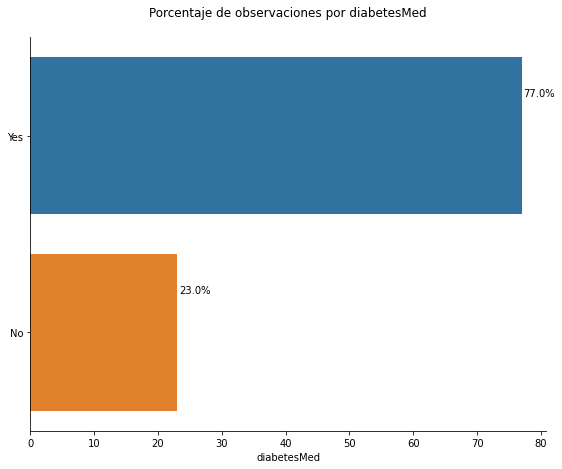

In [221]:
Graph_bars('diabetesMed')

Para los demás atributos categóricos se tiene un comportamiento muy similar, en el que el valor 'No' tiene la mayoría de ocurrencias con valores que van desde el 90 al 99%, mientras que los demás valores tienen una representación baja. A excepción de las siguientes.

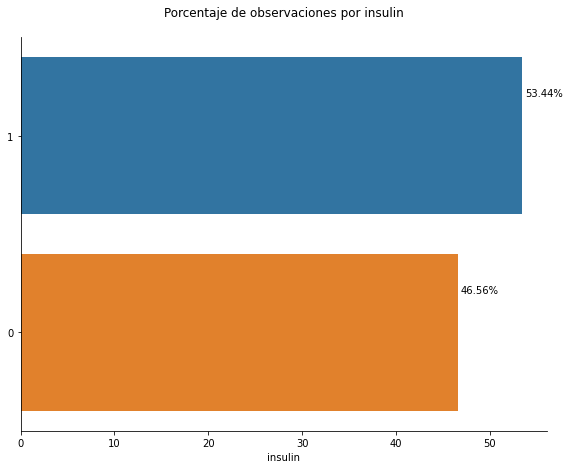

In [222]:
Graph_bars('insulin')

Para el caso de la insulina se tiene una participación más representativa en categorías diferentes a 'No'

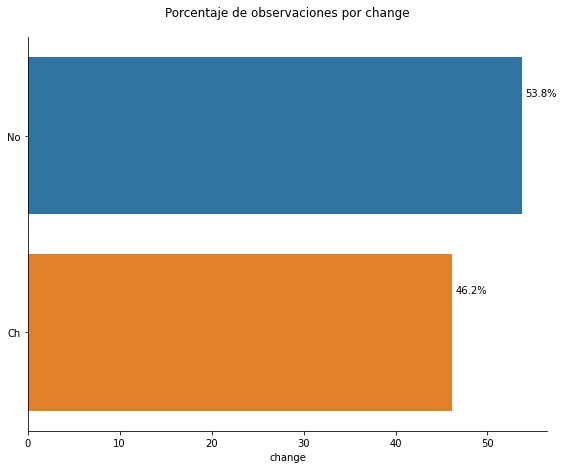

In [223]:
Graph_bars('change')

En el caso del atributo 'chamge' la distribución es más uniforme entre los valores que no recibieron un cambio y los que si.

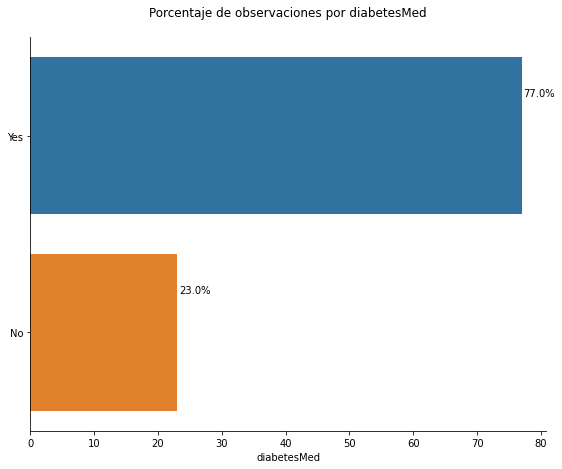

In [224]:
Graph_bars('diabetesMed')

El 77% de los pacientes tienen medicación por algún tipo de diabetes.

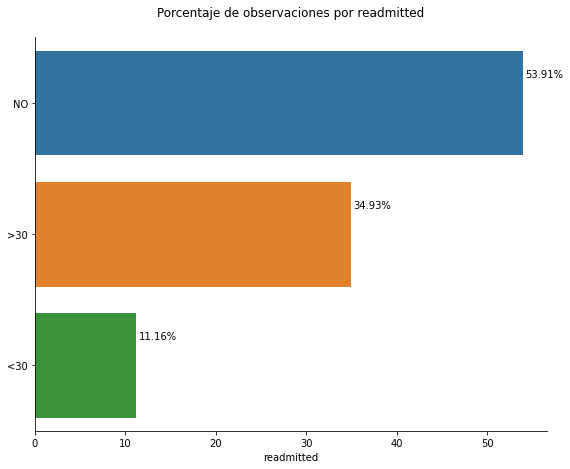

In [225]:
Graph_bars('readmitted')

Cerca del 54% de los pacientes no sufrieron de un reingreso, mientras que de los que si tuvieron un reingreso, el 35 porciento lo hizo despues de 30 días y el restante 11 lo hizo antes de los primeros 30 días. 
No tenemos un set de datos con una baja representación de alguna de las clases de interés. 

A continuación se efectúa el análisis univariable para los atributos numéricos.

In [226]:
# Estadística descriptiva de las variables numericas
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.196411,0.015123,...,0.003027,0.000373,0.000029,0.000383,0.534393,0.006937,0.000128,0.000010,0.000020,0.000010
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.397285,0.122043,...,0.054931,0.019320,0.005429,0.019573,0.498818,0.083003,0.011302,0.003135,0.004433,0.003135
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
# Función para graficar la distribución
def Graph_hist(variable):
    plt.figure(figsize=(9,8))
    ax = sns.distplot(df[variable], color = 'b', hist_kws={'alpha':0.4})
    plt.title('Histograma para ' + variable + '\n');

In [228]:
def Graph_box(variable):
    # Box plot for Flipper Length (mm)
    sns.boxplot(data = df[variable])
    plt.title('Box plot para ' + variable);

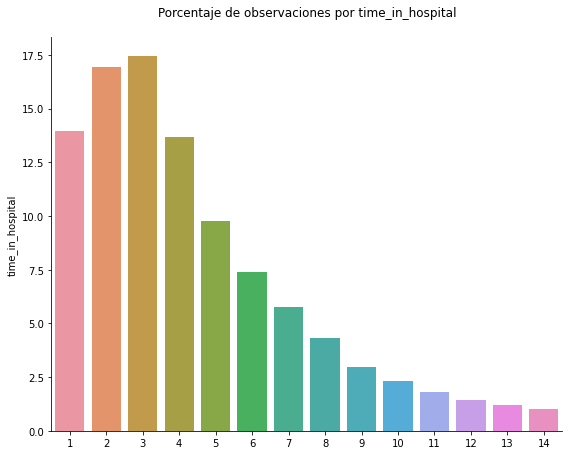

In [229]:
# Gráfico de barras para el tiempo en el hospital
per = df['time_in_hospital'].value_counts(0)
g = sns.catplot(data = df, x = per.index, y = per*100/sum(per), kind = 'bar', orient = 'v',
                height = 6, aspect = 1.3)
plt.title('Porcentaje de observaciones por ' + 'time_in_hospital' + '\n')
plt.show();

Podemos observar como se observa una distribución con una cola izquierda, es decir que la cantidad de pacientes que pasan más tiempo en el hospital disminuye mientrás más tiempo se pasa.
Gran parte de la muestra se encuentra para los pacientes que tuvieron una estancia entre 1 y 5 días, siendo tres días lo más común. 

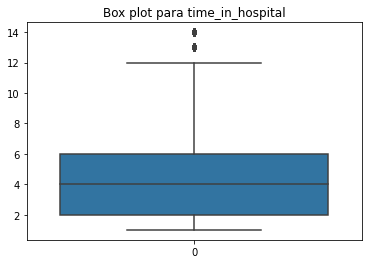

In [230]:
Graph_box('time_in_hospital')

El box plot nos permite visualizar el comportamiento descrito con el histograma, existe una gran volumen de casos cuya estancia se encuentra entre uno y cuatro días, siendo este el caso para el 50% de los pacientes. Aquellos cuyo tiempo hospitalizados supera los 12 días puedens er considerados como puntos extremos.

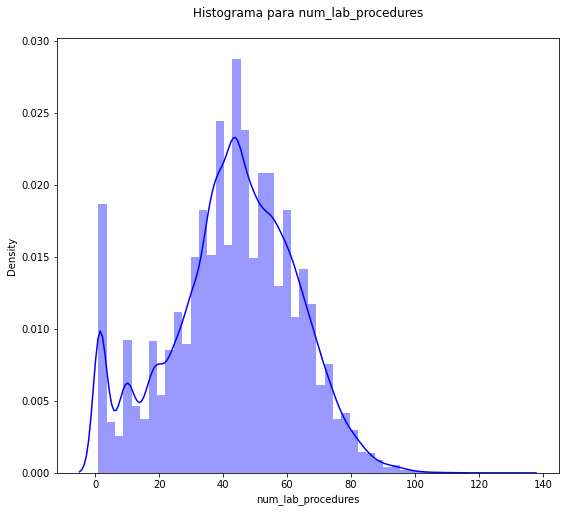

In [231]:
Graph_hist('num_lab_procedures')

Se observa que la distribución no es normal, dado que se tiene una gran cantidad de pacientes que tienen un único procedimiento en laboratorio. Vemos que lo más normal es que un paciente tenga 43 examenes de laboratorio, y como la probabilidad de tener 80 o más procedmientos de este tipo, disminuye.   

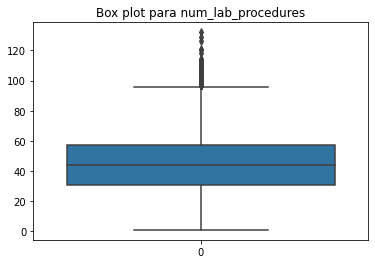

In [232]:
Graph_box('num_lab_procedures')

El box plot nos ayuda a enteden el comportamiento de la cantidad de procedimientos de laboratorio en la muestra, el valor medio se encuentra en los 44 procedimientos, y el 75% de los casos tuvieron menos de 60. Podemos considerar como puntos extremos aquellas personas que tuvieron más de 100 de estos procedimientos.

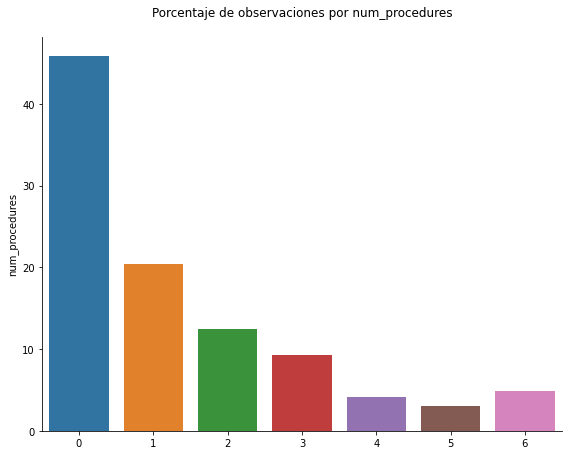

In [233]:
# Gráfico de barras para el num_procedures
per = df['num_procedures'].value_counts(0)
g = sns.catplot(data = df, x = per.index, y = per*100/sum(per), kind = 'bar', orient = 'v',
                height = 6, aspect = 1.3)
plt.title('Porcentaje de observaciones por ' + 'num_procedures' + '\n')
plt.show();

Cerca del 50% de los pacientes no reciben procedimeintos médicos, el máximo de procedimentos brindados fué de seis.

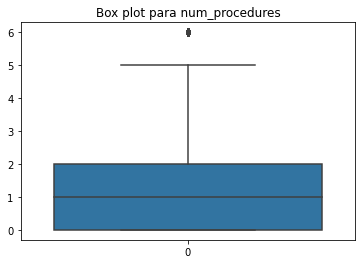

In [234]:
Graph_box('num_procedures')

El 75% de los pacientes recibe entre cero y dos procedimientos médicos, mientras que el restante 25% puede recibir hasta seis.

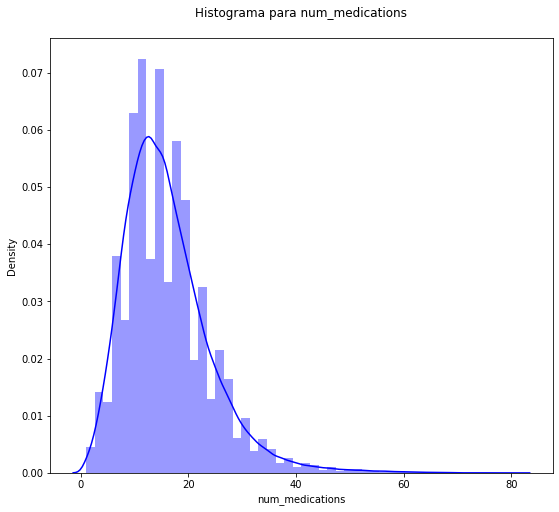

In [235]:
Graph_hist('num_medications')

El número de medicamentos administrados tiene una distribución normal con una cola izquierda, esto quiere decir que muy pocos pacientes reciben pocos medicamentos y pocos reciben una gran cantidad (40 medicamentos o más), pero existen casos en los que la medicación llega a ser de más de 60.

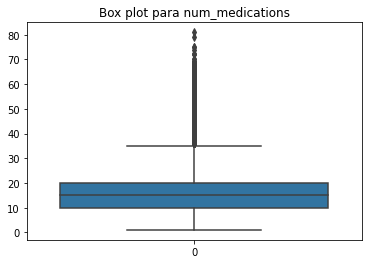

In [236]:
Graph_box('num_medications')

El box plot ilustra el comportamiento de descrito de la distribución de la cantidad de medicamentos administrados, dado que vemos como existe una tendencia de los datos hacía las cantidades mayores a 40 y la existencia de puntos extremos, mientras que los demás datos puedens er asociados auna distribución normal.

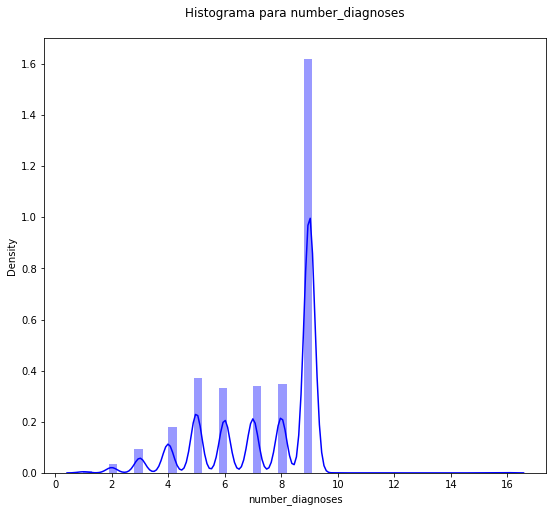

In [237]:
Graph_hist('number_diagnoses')

En cuanto al número de diagnósticos, se aprecia como la mayoría de los pacientes tienen nueve diagnósticos, mientras que las cantidades de pacientes con 5 a 8 son muy similares y muy bajas para otras cifras, como 1, 2 o más de 9 diagnósticos.   

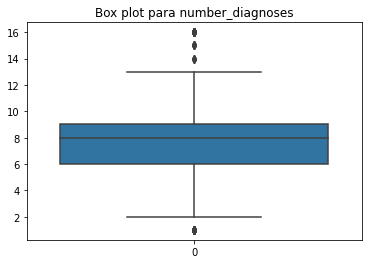

In [238]:
Graph_box('number_diagnoses')

Según el box plot podemos considerar como puntos extremos aquellos que superan los 13 diagnósticos o lo que tan solo tienen uno. Lo que nos indica que un paciente normalmente tiene por lo menos dos diagnósticos.

Conclusiones:
- No se observan outliers que deban ser tratados, ya que si bien existen puntos extremos, no se observan valores que puedan correspnoder a errores o generar incongruencias en los datos.
- Seria necesario validar el diseño del experimento para validar si el modelo puede ser aplicable a razas diferente a la caucásica.
- Existen atributos que podrían ser modificados mediante procesos de feature engineering, con el fin disminuir los valores o la dimensionalidad de los datos. Entre ellos: discharge_disposition_id y admission_source_id.

#### Análisis Multivariable

Se realiza análisis multivariable de atributos categoricos y numericos vs si un paciente tuvo readmisión o no.

In [239]:
# Definir función para la visualización de datos categoricos vs 'readmitted'
def Graph_mul_bars(variable):
    plt.figure(figsize = (10,6))
    ax = sns.countplot(y=variable, hue = "readmitted", data = df)
    plt.title("Cantidades de pacientes por readmisión según " + variable);

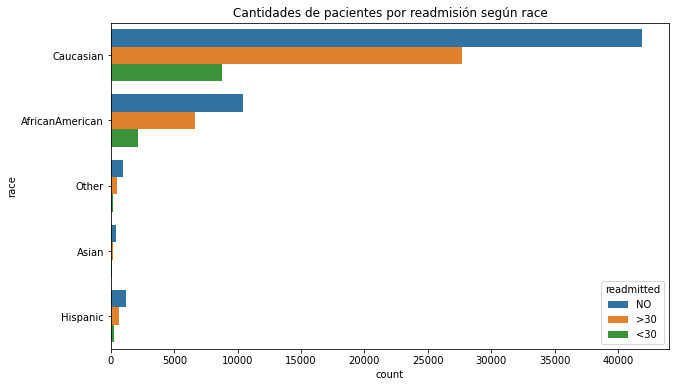

In [240]:
Graph_mul_bars('race')

Se observa un comportamiento de las readmisiones muy similar para cada raza, en la que la mayoría de pacientes no tienen una readmisión, mientras que las readmisiones despúes de 30 días es la segunda más común y en menor cantidad la readmisión inferior en un plazo de 30 días. Una hipótesis a plantear es que la raza no es un atributo crítico en la determinación de la readmisión de un paciente.

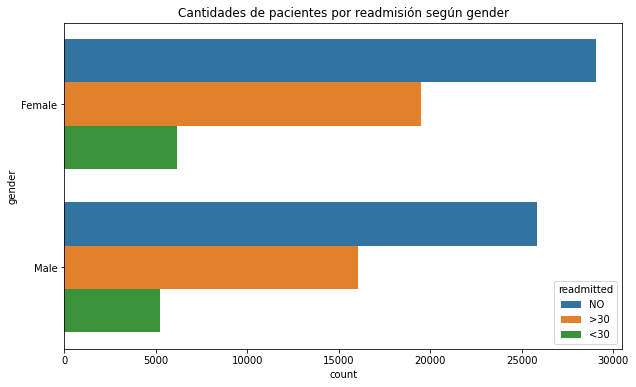

In [241]:
Graph_mul_bars('gender')

Se observa un comportamiento similar de readmisiones entre géneros, de manera que se podría hipotetizar que el género no influye en el tipo de readmisión. 

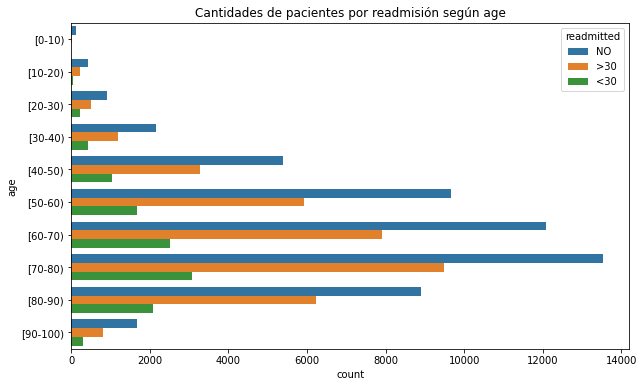

In [242]:
Graph_mul_bars('age')

En la totalidad de los grupos por edad la no readmisión de los pacientes es la que más casos tiene, seguida por ña readmisión superior a 30 días y la menor a 30 días. No se observa un comportamiento particularmente distinto entre los grupos de edad, algo contraituitivo a lo esperado, dado que se espería que con una edad más avanzada se presentaran una mayor proporción de reingresos.  

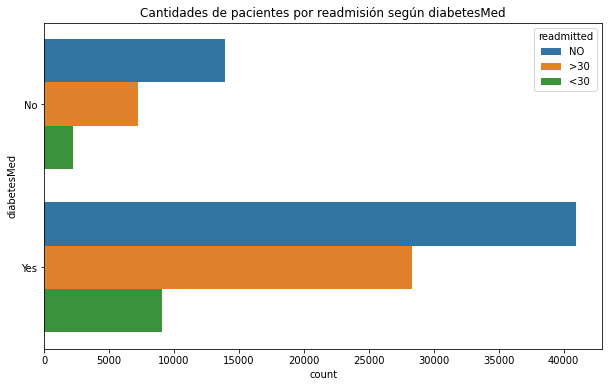

In [243]:
Graph_mul_bars('diabetesMed')

En el caso de la distribucion de readmitidos según si tienen o no medicación para la diabetes se observa el mismo comportamiento de las proporciones por tipo de readmisión.

In [244]:
def Graph_mul_hist(variable):
    plt.figure(figsize = (10,6))
    ax = sns.displot(
        data=df, kind="hist", kde=True,
        x=variable, hue = 'readmitted'
    )
    plt.title('Distribución para ' + variable + ' para cada tipo de readmisión');

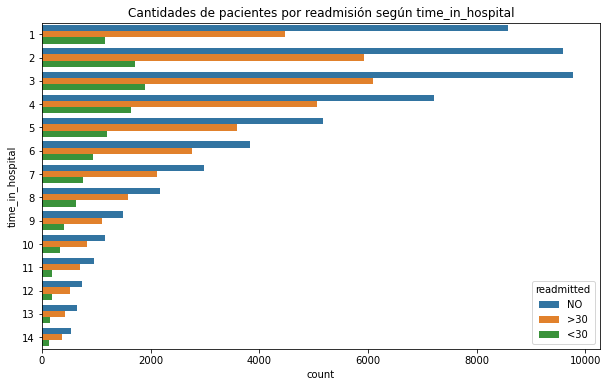

In [245]:
Graph_mul_bars('time_in_hospital')

In [246]:
# Definición de función para gráficar box plot según tipo de readmisión
def Graph_mul_box(variable):
    plt.figure(figsize = (10,6))
    ax = sns.boxplot(x= "readmitted", y=variable, data = df)
    ax.tick_params(axis='x', labelrotation=45)
    plt.title("Boxplot de " + variable + " por tipo de readmisión");

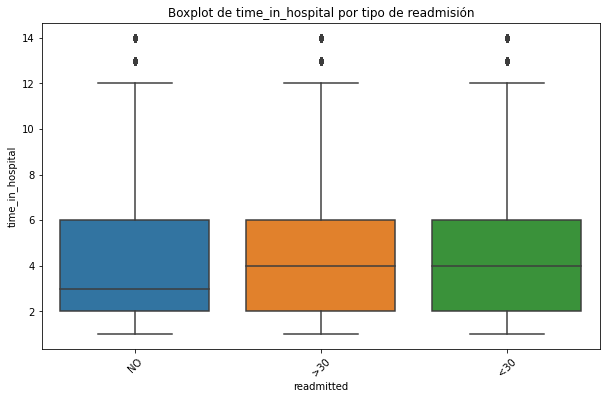

In [247]:
Graph_mul_box('time_in_hospital')

Las distribuciones de tiempo para los tipos de readmisión son muy similares, especialmente las de los readmitidos. La que presenta una leve diferencia es la de los no readmitidos, ya que la mediana de tiempo para los no readmitidos es de 3 días, mientras que para las demás es de 4. 

<Figure size 720x432 with 0 Axes>

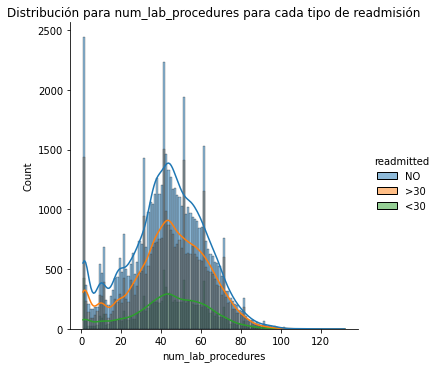

In [248]:
Graph_mul_hist('num_lab_procedures')

Las distribuciones de las cantidades de procedimientos de laboratorio para cada tipo de readmisión son muy similares, más allá de que los volumenes de casos sean distintos. Así que se espera que el atributo no tenga una gran incidencia en la clasificación de los tipos de readmisión.

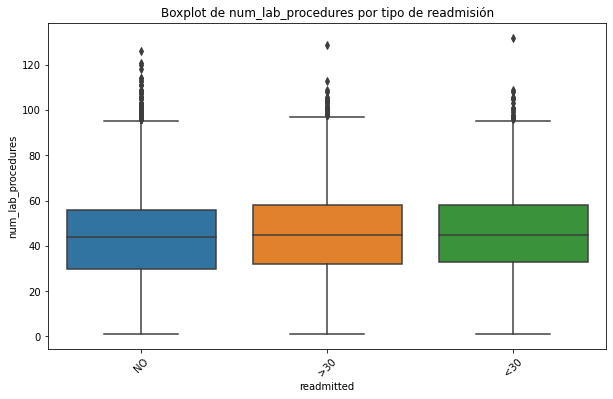

In [249]:
Graph_mul_box('num_lab_procedures')

Los gráficos de box plot validan las distribuciones tan similares entre tipos de readmisión para la cantidad de procedimientos de laboratorio. 

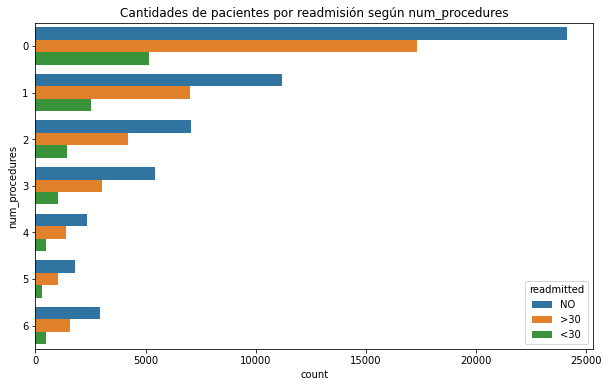

In [250]:
Graph_mul_bars('num_procedures')

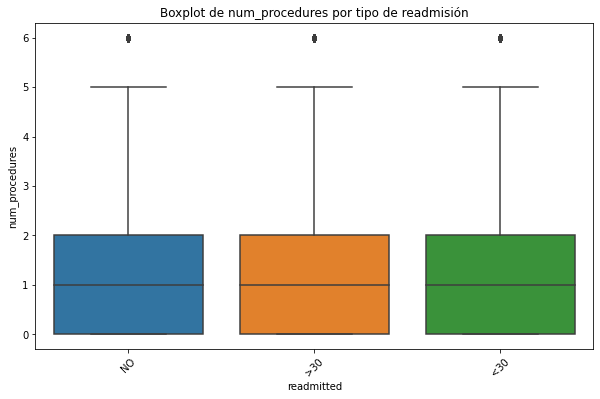

In [251]:
Graph_mul_box('num_procedures')

Las distribuciones de las cantidades de procedimientos por tipo de readmisión son muy similares entre si. 

La siguiente visualización es la correlación de variables numéricas, esta se realiza con el fin de establecer si existe algun tipo de comportamiento correlacionado entre variables y plantear la eliminación de alguna o de otro tipo de ingeniería de atributos.

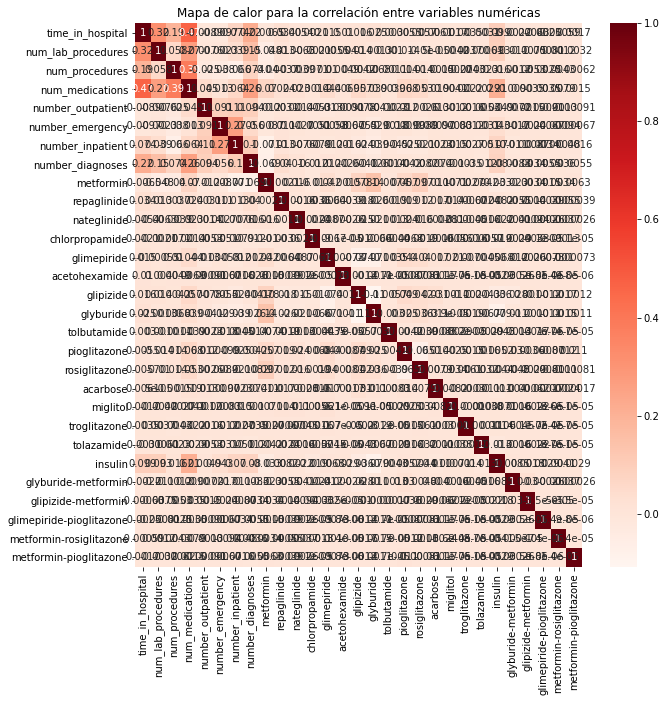

In [252]:
# Mapa de calor para la correlación entre variables numéricas
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.title('Mapa de calor para la correlación entre variables numéricas')
plt.show();

Como podemos observar en el mapa de calor, parece no existir correlaciones moderadas o fuertes entre variables. Por lo tanto, no podemos determinar algún tipo de correlación que amerite ser validada y nos lleve a pensar en la simplificación de atributos.

## 8. Preparación de los datos

Una vez realizada la limpieza de datos y haber establecido cual es el comportamiento de estos, se requiere de ralizar transformaciones para que estos puedan ser utilizados en los modelos de aprendizaje supervisado. Dada la presencia de atributos catergóricos sin codificar se necesita de su codificación, así como la normalización de los valores numéricos mediante el método seleccionado MinMaxScaler.

In [253]:
# Códificación de las etiquetas objetivo 'readmitted'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [254]:
data = df.copy()
data['readmitted'] = le.fit_transform(data['readmitted'])

In [255]:
print(le.classes_)

['<30' '>30' 'NO']


In [256]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,2
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,1,0,0,0,0,0,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,No,Yes,2
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,1,0,0,0,0,0,Ch,Yes,2
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,Ch,Yes,2


In [257]:
# Normalización de las variables numéricas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [258]:
col_num = []
for col in df.columns:
    if df[col].dtype == 'int64':
        col_num.append(df[col].name)

In [259]:
data[col_num] = scaler.fit_transform(data[col_num])

In [260]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,0.000000,0.305344,0.000000,0.0000,...,0,0,0,0,0,0,0,No,No,2
1,Caucasian,Female,[10-20),1,1,7,0.153846,0.442748,0.000000,0.2125,...,0,1,0,0,0,0,0,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,1,7,0.076923,0.076336,0.833333,0.1500,...,0,0,0,0,0,0,0,No,Yes,2
3,Caucasian,Male,[30-40),1,1,7,0.076923,0.328244,0.166667,0.1875,...,0,1,0,0,0,0,0,Ch,Yes,2
4,Caucasian,Male,[40-50),1,1,7,0.000000,0.381679,0.000000,0.0875,...,0,1,0,0,0,0,0,Ch,Yes,2


In [261]:
# Creación de variables dummy para los atributos categóricos


In [262]:
col_cat = []
for col in df.columns[0:-1] :
    if df[col].dtype == 'object':
        col_cat.append(df[col].name)

In [263]:
data = pd.get_dummies(data, columns=col_cat, drop_first=True)

In [264]:
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_respiratory,change_No,diabetesMed_Yes
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333,0,0,...,0,0,0,0,0,0,1,0,1,1
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667,0,0,...,1,0,0,0,0,0,0,0,0,1


In [265]:
data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       ...
       'diag_3_diabetes', 'diag_3_digestive', 'diag_3_genitourinary',
       'diag_3_injury', 'diag_3_musculoskeletal', 'diag_3_neoplasms',
       'diag_3_other', 'diag_3_respiratory', 'change_No', 'diabetesMed_Yes'],
      dtype='object', length=118)

## 9. Modelado

En esta fase se realiza la generación de varios modelos de aprendizaje supervisado de clasificación, su evaluación se realiza bajo  la métrica de recall_score, se selecciona aquel que mejores resultados obtengamos para los datos de prueba en el macro average para recall, dado que tenemos una menor cantidad de registros para las clases de interés. Teniendo en cuenta que la métrica seleccionada a máximizar es el recall, dado que nos interesa obtener una alta precisión en los valores clasificados correctamente y baja en los falsos negativos, dado que un paciente clasificado como que no requiere reingreso y realmente si lo necesita, puede significar en un alto riesgo para el paciente.

Las tareas a ejecutar son:

1. División de los datos de entrenamiento y prueba.
2. Entrenamiento de cada uno de los cuatro algoritmos seleccionados y ajuste de los hiperparametros por medio de GridSearch. Los algoritmos a utilizar son: 
    - Logistic Regression
    - KNeighbors Classifier
    - Decision Tree Classifier
    - Random Forest Classifier
    
3. Evaluación y selección del algoritmo con los mejores resultados.
4. Validación con datos nuevos.

#### 1. División de los datos de entrenamiento y prueba.

In [266]:
# Importación de librerías requeridas
from sklearn.model_selection import train_test_split

In [267]:
X = data.drop(columns=['readmitted'])
y = data['readmitted']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 2. Entrenamiento de los 5 algoritmos seleccionados.

##### - Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [270]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga')
grid = {'C':[0.01, 0.1, 1, 10, 100]}

In [273]:
grid_lr_acc = GridSearchCV(lr, param_grid = grid, scoring='recall', cv = 5)
grid_lr_acc.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='recall')

In [320]:
print('Mejores parámetros (max. recall): ', grid_lr_acc.best_params_)

Mejores parámetros (max. recall):  {'C': 0.01}


In [297]:
y_predict = grid_lr_acc.predict(X_train)


In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.00      0.00      9116
           1       0.51      0.21      0.30     28429
           2       0.58      0.92      0.71     43867

    accuracy                           0.57     81412
   macro avg       0.60      0.38      0.34     81412
weighted avg       0.57      0.57      0.49     81412



In [311]:
print('Macro-averaged precision = {:.2f} (Trata equitativamente las clases)'
      .format(recall_score(y_train, y_predict, average = 'macro')))

Macro-averaged precision = 0.38 (Trata equitativamente las clases)


In [308]:
lr_recall_train = recall_score(y_train, y_predict, average = 'macro')

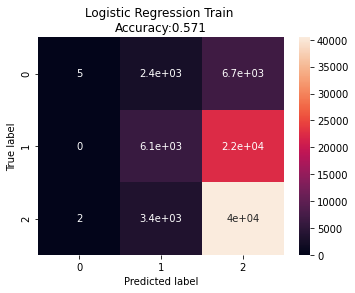

In [310]:

confusion_mc = confusion_matrix(y_train, y_predict)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Logistic Regression Train \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, 
                                                                    y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [312]:
y_predict_test = grid_lr_acc.predict(X_test)

In [313]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      2241
           1       0.51      0.22      0.30      7116
           2       0.58      0.92      0.71     10997

    accuracy                           0.57     20354
   macro avg       0.59      0.38      0.34     20354
weighted avg       0.57      0.57      0.49     20354



In [314]:
lr_recall_test = recall_score(y_test, y_predict_test, average = 'macro')

##### - KNeighbors Classifier

In [315]:
from sklearn.neighbors import KNeighborsClassifier

In [319]:
knn = KNeighborsClassifier()
grid = {'n_neighbors':[3, 4, 5, 10]}
grid_knn = GridSearchCV(knn, param_grid = grid, scoring='recall', cv = 5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 10]}, scoring='recall')

In [321]:
print('Mejores parámetros (max. recall): ', grid_knn.best_params_)

Mejores parámetros (max. recall):  {'n_neighbors': 3}


In [322]:
y_predict = grid_knn.predict(X_train)

In [323]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.44      0.61      0.51      9116
           1       0.72      0.62      0.67     28429
           2       0.79      0.79      0.79     43867

    accuracy                           0.71     81412
   macro avg       0.65      0.67      0.65     81412
weighted avg       0.72      0.71      0.71     81412



In [324]:
knn_recall_train = recall_score(y_train, y_predict, average = 'macro')

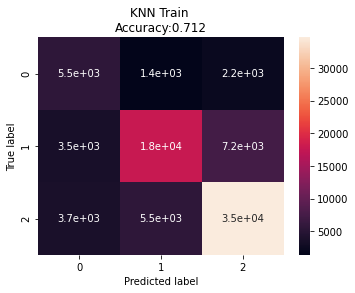

In [330]:
confusion_mc = confusion_matrix(y_train, y_predict)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('KNN Train \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, 
                                                                    y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [326]:
y_predict_test = grid_knn.predict(X_test)

In [327]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.14      0.20      0.16      2241
           1       0.39      0.34      0.36      7116
           2       0.58      0.58      0.58     10997

    accuracy                           0.45     20354
   macro avg       0.37      0.37      0.37     20354
weighted avg       0.46      0.45      0.46     20354



In [328]:
knn_recall_test = recall_score(y_test, y_predict_test, average = 'macro')

#### - Decision Tree Classifier

In [331]:
from sklearn.tree import DecisionTreeClassifier

In [346]:
tree = DecisionTreeClassifier(random_state = 0)
grid = {'max_depth':[1, 3, 5, 8, 10], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}
grid_tree = GridSearchCV(tree, param_grid = grid, scoring='recall', cv = 5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20]},
             scoring='recall')

In [347]:
print('Mejores parámetros (max. recall): ', grid_tree.best_params_)

Mejores parámetros (max. recall):  {'max_depth': 1, 'min_samples_leaf': 1}


In [348]:
y_predict = grid_tree.predict(X_train)

In [349]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9116
           1       0.44      0.43      0.43     28429
           2       0.61      0.76      0.68     43867

    accuracy                           0.56     81412
   macro avg       0.35      0.39      0.37     81412
weighted avg       0.49      0.56      0.52     81412



In [350]:
tree_recall_train = recall_score(y_train, y_predict, average = 'macro')

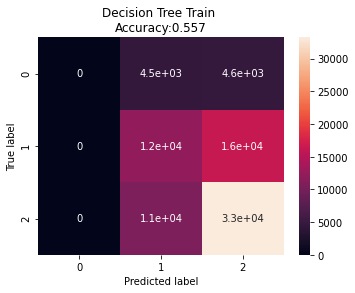

In [351]:
confusion_mc = confusion_matrix(y_train, y_predict)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Decision Tree Train \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, 
                                                                    y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [352]:
y_predict_test = grid_tree.predict(X_test)

In [353]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2241
           1       0.45      0.44      0.44      7116
           2       0.62      0.76      0.68     10997

    accuracy                           0.56     20354
   macro avg       0.36      0.40      0.38     20354
weighted avg       0.49      0.56      0.52     20354



In [354]:
tree_recall_test = recall_score(y_test, y_predict_test, average = 'macro')

#### - Random Forest Classifier

In [343]:
from sklearn.ensemble import RandomForestClassifier

In [356]:
forest = RandomForestClassifier(random_state = 0)
grid = {'max_depth':[1, 3, 5, 8, 10]} 
grid_forest = GridSearchCV(forest, param_grid = grid, scoring='recall', cv = 5)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 8, 10]}, scoring='recall')

In [357]:
print('Mejores parámetros (max. recall): ', grid_forest.best_params_)

Mejores parámetros (max. recall):  {'max_depth': 1}


In [358]:
y_predict = grid_forest.predict(X_train)

In [359]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9116
           1       0.00      0.00      0.00     28429
           2       0.54      1.00      0.70     43867

    accuracy                           0.54     81412
   macro avg       0.18      0.33      0.23     81412
weighted avg       0.29      0.54      0.38     81412



In [360]:
forest_recall_train = recall_score(y_train, y_predict, average = 'macro')

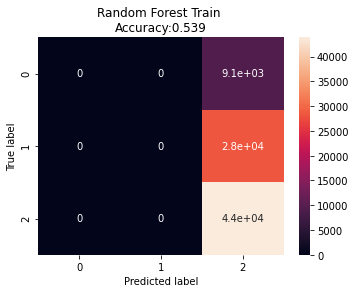

In [361]:
confusion_mc = confusion_matrix(y_train, y_predict)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Random Forest Train \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, 
                                                                    y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [362]:
y_predict_test = grid_forest.predict(X_test)

In [363]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2241
           1       0.00      0.00      0.00      7116
           2       0.54      1.00      0.70     10997

    accuracy                           0.54     20354
   macro avg       0.18      0.33      0.23     20354
weighted avg       0.29      0.54      0.38     20354



In [364]:
forest_recall_test = recall_score(y_test, y_predict_test, average = 'macro')

#### - Selección del modelo

In [365]:
recall_res = [lr_recall_train, lr_recall_test,
              knn_recall_train, knn_recall_test,
              tree_recall_train, tree_recall_test,
              forest_recall_train, forest_recall_test]

In [372]:
recall_name = ['lr_train', 'lr_test',
              'knn_train', 'knn_test',
              'tree_train', 'tree_test',
              'forest_train', 'forest_test']

Text(0, 0.5, 'Recall')

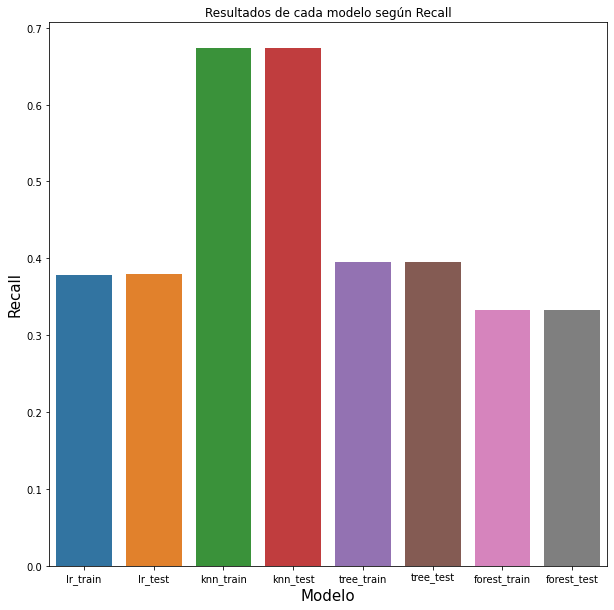

In [374]:
plt.figure(figsize=(10,10))
plt.title("Resultados de cada modelo según Recall")
ax = sns.barplot(x=recall_name, y=recall_res)
ax.set_xlabel('Modelo',fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)

El modelo con los mejores resultados en la métrica del Recall tanto para los datos de entrenamiento como de prueba es el:

- KNeighbors Classifier con k = 3.

## 10. Evaluación

Divulgación y evaluación de los hallazgos y(o solución con el negocio.

- ¿El resultado resuelve el problema planteado?

La evaluación del modelo se da con los stakeholders, ya que con ellos se valida si el resultado obtenido se ajusta a las reglas de negocio y satisface el problema inicialmente planteado. Aquí se ejecutan actividades como lo puede ser una presentación gerencial que muerte parte del proceso ejecutado y la solución al problema. 
Dependiendo del tipo de producto se puede plantear una prueba de concepto o ejecución de un prototipo.

## 11. Despliegue

En esta fase se despliega la solución generada y aprobada por el negocio. 
- ¿La solución puede ser puesta en marcha?

Es aquí en donde se ejecutan las activiades necesarias para la implementación de la solución y el producto final, este puede ser de varios tipos, pero el más común es un producto tecnologico como un nueva aplicación o funcionalidad. Por lo que aquí se deben ejecutar las tareas necesarias para que el producto sea usado por los interesados. 

En este paso se incluyen actividades de MLOps o desarrollo de software. en este caso se realiza el despligue de este Jupyter Notebook en GitHub en la dirección: https://github.com/FabianPedreros/Agata_DS_Prueba_Tecnica


## 12. Retroalimentación

- ¿Se puede obtener retroalimentación del proyecto?

Esta fase es de la de mantenimiento y mejora del producto final entregado, el proceso es cíclico y debe atender las modificaciones y cambios que se puedan dar en los datos de entrada como en las reglas y necesidades del negocio. 

Por lo que las actividades aquí van encaminadas a procesos de retroalimentación de los resultados obtenidos y ejecución de ajustes, estos deben ser planificados ya sea con base en alguna periodicidad planteada o métricas, como lo puede ser un valor mínimo del recall en producción.

Aquí se planean y ejecutan actividades de MLOps y desarrollo de software destindas al mantenimiento de aplicaciones o funcionalidades.